# Importing All the necessary libraries

In [1]:
# Set up the imports
%matplotlib ipympl
import numpy as np
from numpy import cos, sin, pi, exp 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

### Defining the functions for the 2-D Gradient Descent

In [2]:

# Fucntion definition to be taken as input by the function
def f(x):
    return x**4 - 3*x**2 + 1*x 

# Derivative definition to be taken as input by the program
def df(x):
    return 4*x**3 -6*x + 1

#defining the starting point for the algorithm
bestx = 5


### Plotting the animation for the 2-D Gradient descent

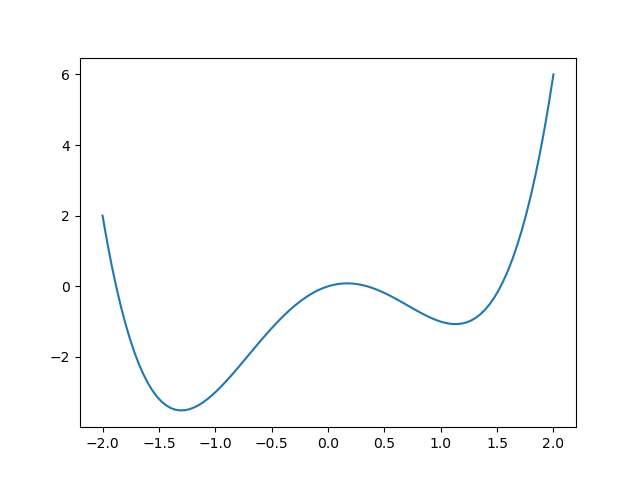

In [6]:
# Creating objects for the plot
rangemin, rangemax = -5, 5 
fig, ax = plt.subplots()
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)

# Defining a functiont update the plot according to the frames being passed to it, This uses global variables funcd and func as the derivative anf the function respectively
def onestepderiv(frame):
    # Accessing global variables for updating the function
    global bestx, lr

    #Updating with each iteration
    x = bestx - funcd(bestx) * lr 
    bestx = x
    y = func(x)

    #Adding the results to the plot
    lngood.set_data(x, y)
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    return lngood,


def Plot_grad(Eqn,derivative,start,learning):
    
    # Accessing global variables for updating the function
    global bestx, lr , func , funcd
    
    # Passing the function for the update function
    func = Eqn
    funcd = derivative

    # PLotting the curve
    xbase = np.linspace(-2, 2, 100)
    ybase = func(xbase)
    bestx = start
    plt.plot(xbase, ybase)

    # Declaring the learning rate
    lr = learning

    # Create the animation object for the gradient descent plot
    ani= FuncAnimation(fig, onestepderiv,frames=range(10), interval=1000, repeat=False)
    return ani

# Call the function to create and display the gradient descent plot animation
anim = Plot_grad(f,df,2,0.01)
plt.show()

This code creates a function that takes a function and its derivative, starting point and learning rate as inputs, and plots the function curve along with an animation of gradient descent algorithm for finding the minimum of the function. The gradient descent animation shows how the algorithm updates the starting point iteratively until it reaches the minimum of the function. The code uses matplotlib library to create the plot and animation.

# Varaible number of variables
### Defining the variables for variable number case

In [8]:
# Defning the function and derivatives

def fvar(xs):
    return xs[0]**2 + xs[1]**2

def deriv(xs):
    return [2*xs[0],2*xs[1]]

### Code for the Stochastic Gradient descent

In [9]:
# Declaring an array with the size of number of variables(2 here)
xs = np.zeros(2)

# Defining a function to find the minima of the curve using gradient discent
def grad_min(f,df,start,lr):
    for i in range(1000):
        xs = start - np.array(df(start))*lr
        start = xs
    return f(xs)

# Defining a function to do stochastic gradient descent
def Stoc_descent(n):
    best_a = 100
    for i in range(n):
        a = grad_min(fvar,deriv,np.random.uniform(-10, 10, size=2),0.1)
        if a < best_a:
            best_a = a
    print(a)

# Testing the result
Stoc_descent(100)

1.8042999806763795e-192


The code defines two functions: `grad_min()` which performs gradient descent on a given function to find its minima, and `Stoc_descent()` which performs stochastic gradient descent by calling `grad_min()` multiple times with random starting points and returns the best minimum found. The code then tests the `Stoc_descent()` function by calling it with 100 iterations and printing the best minimum found.

# 3-D Animated Gradient descent
### Defining the function and the derivatives

In [10]:
# Declaring the function and the pltting limits
xlim3 =  [-10, 10]
ylim3 =  [-10, 10]
def f3(x, y):
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

def df3_dx(x, y):
    return 4*x**3 - 48*x**2 + 192*x - 256

def df3_dy(x, y):
    return 2*y - 4

### Animating the 3-D Gradient descent

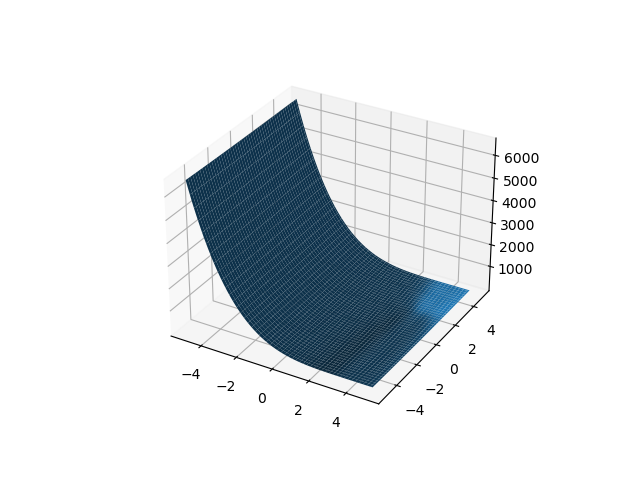

In [11]:
# Define the range of x and y values
r = [-5, 5]
x = np.linspace(r[0], r[1], 100)
y = np.linspace(r[0], r[1], 100)

# Set up the 3D plot
X, Y = np.meshgrid(x, y)
Z = f3(X, Y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z)

# Initialize starting values
bestx = -0.1
besty = -0.1

# Create empty lists to store the history of x, y, and z values
xall, yall, zall = [], [], []

# Create plot objects for the current and past positions of the best solution
lnall, = ax.plot([], [], [], 'bo')
lngood, = ax.plot([], [], [], 'go', markersize=10)


# Define the function to update the plot for each iteration of the optimization algorithm
def onestepderiv(frame):
    global bestx, besty

    # Perform a 2D gradient descent step to update the position of the best solution
    X = bestx - df3_dx(bestx, besty) * lr 
    Y = besty - df3_dy(bestx, besty) * lr 

    # Update the best solution with the new position
    bestx = X
    besty = Y

    # Evaluate the function at the new position
    Z = f3(X, Y)

    # Update the plot with the new position of the best solution and the history of past positions
    lngood.set_data([X], [Y])
    lngood.set_3d_properties([Z])
    xall.append(X)
    yall.append(Y)
    zall.append(Z)
    lnall.set_data(xall, yall)
    lnall.set_3d_properties(zall)


# Set the learning rate for the optimization algorithm
lr = 0.01

# Use FuncAnimation to animate the optimization process and then plot it
ani = FuncAnimation(fig, onestepderiv, frames=range(2000), interval=10, repeat=False)
plt.show()


This code generates a 3D plot of a function and uses gradient descent to find the minimum value of the function. The range of x and y values is defined, and the function is evaluated on the meshgrid of x and y values. Starting values for the minimum are initialized, and empty lists are created to store the history of x, y, and z values. The onestepderiv function is defined to update the plot for each iteration of the optimization algorithm. The learning rate is set for the optimization algorithm, and FuncAnimation is used to animate the optimization process and then plot it.